# 傅里叶变换介绍

### 关于一维傅里叶变换请阅读  [An Interactive Introduction to Fourier Transforms](https://www.jezzamon.com/fourier/zh-cn.html)

#### 二维傅里叶变换通常应用于图像处理，实现方式通常为：
>先对图像（2D）的每行（1D）做一维离散傅里叶变换;

>再对已经在行维度经过一维离散傅里叶变换的2D数组的每列（1D）做一维离散傅里叶变换。



#### 以圆图为例：

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

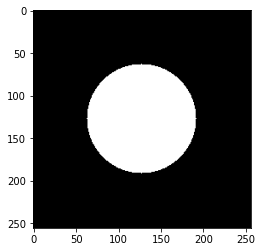

In [2]:
H, W, r = 256, 256, 64
circle_img = np.zeros([H, W])
circle_img = cv2.circle(circle_img, (127, 127), r, color=255, thickness=-1)
plt.imshow(circle_img, cmap='gray')
plt.show()

#### 直接对其作2d-fft，并绘制出它的幅度图：

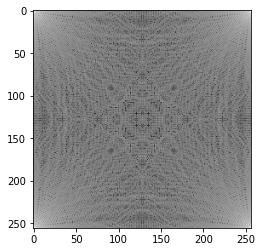

In [19]:
img_fft2 = np.fft.fft2(circle_img)
img_mag = np.abs(img_fft2)
img_mag_log = np.log(img_mag+1)
plt.imshow(img_mag_log, cmap='gray')
plt.show()

#### 先对其作沿第0维度作1d-fft，再沿第1维度作1d-fft，并绘制出它的幅度图：

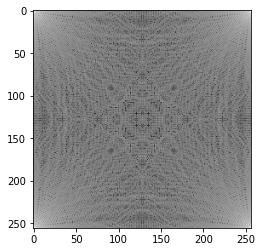

In [4]:
img_fft_h = np.fft.fft(circle_img, axis=0)
img_fft_hw = np.fft.fft(img_fft_h, axis=1)
img_mag_hw = np.log(np.abs(img_fft_hw)+1)
plt.imshow(img_mag_hw, cmap='gray')
plt.show()

#### 计算两种2d-fft结果的差异，可以看出二者是等价的

In [5]:
np.mean(img_fft_hw-img_fft2)

0j

#### 对图像作2d-fft后，图像的低频信息会集中在频谱图的四个顶点处，不便于后续的处理，因此一般会对其作shift操作

#### shift操作可以理解为将频谱图按对角线交换位置，具体可参考[通俗讲解：图像傅里叶变换](https://zhuanlan.zhihu.com/p/99605178?utm_source=qq)，经过shift后，频谱图中的低频信息会集中于图像中心

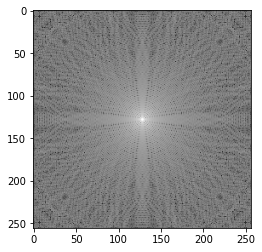

In [6]:
mag_shift = np.fft.fftshift(img_mag)
plt.imshow(mag_shift, cmap='gray')
plt.show()

#### 生成低通滤波和高通滤波的mask

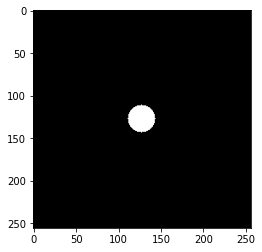

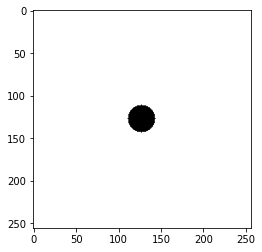

In [15]:
mask = np.zeros(img_mag.shape)
r_pass = 16
low_freq_mask = cv2.circle(mask, (127, 127), r_pass, color=1., thickness=-1)
high_freq_mask = np.ones_like(low_freq_mask) - low_freq_mask
plt.imshow(low_freq_mask, cmap='gray')
plt.show()
plt.imshow(high_freq_mask, cmap='gray')
plt.show()

#### 将mask转为复数

In [16]:
low_freq_mask = low_freq_mask + 0 * np.complex('j')
high_freq_mask = high_freq_mask + 0 * np.complex('j')
print(low_freq_mask[127, 127], high_freq_mask[127, 127])

(1+0j) 0j


#### 将低通滤波器应用于circle_img

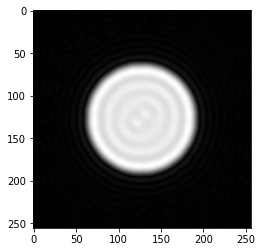

In [13]:
circle_freq_shift = np.fft.fftshift(img_fft2)
low_pass_circle_freq = low_freq_mask * circle_freq_shift
low_pass_circle_freq = np.fft.ifftshift(low_pass_circle_freq)
low_pass_circle = np.fft.ifft2(low_pass_circle_freq)
low_pass_circle = np.abs(low_pass_circle)
plt.imshow(low_pass_circle, cmap='gray')
plt.show()

#### 将高通滤波器应用于circle_img

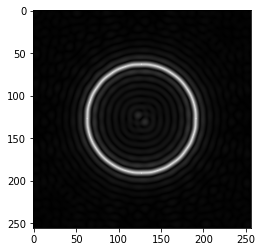

In [31]:
high_pass_circle_freq = high_freq_mask * circle_freq_shift
high_pass_circle_freq = np.fft.ifftshift(high_pass_circle_freq)
high_pass_circle = np.fft.ifft2(high_pass_circle_freq)
high_pass_circle = np.abs(high_pass_circle)
plt.imshow(high_pass_circle, cmap='gray')
plt.show()

#### 图像频谱除幅度外还有相位信息

In [21]:
img_phase = np.exp(1j*np.angle(img_fft2))
img_mag = np.abs(img_fft2)

一般而言，相位信息决定了图像的位置，我们无法通过对幅度图作傅里叶反变换还原出原图，但是可以从相位图得到图像大致的轮廓信息

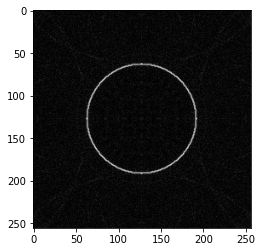

In [22]:
img_Phase = np.fft.ifft2(img_phase)
plt.imshow(np.abs(img_Phase), cmap='gray')
plt.show()

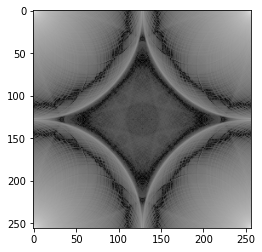

In [24]:
img_Mag = np.fft.ifft2(img_mag)
plt.imshow(np.log(np.abs(img_Mag)+1), cmap='gray')
plt.show()

## 接下来以图像y为例作总结

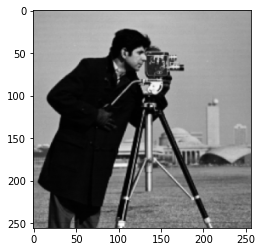

In [37]:
img_y = cv2.imread('/home/mxt/Downloads/y.png', 0)
# print(img_y.shape)
plt.imshow(img_y, cmap='gray')
plt.show()

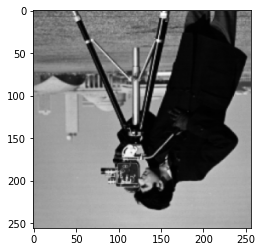

In [38]:
# 对频谱图相位取共轭， 幅度保持不变，可以发现图像被旋转了180°
img_y_freq = np.fft.fft2(img_y/255.)
img_y_freq_inverse = np.conj(img_y_freq)
img_y_inverse = np.fft.ifft2(img_y_freq_inverse)
plt.imshow(np.abs(img_y_inverse), cmap='gray')
plt.show()

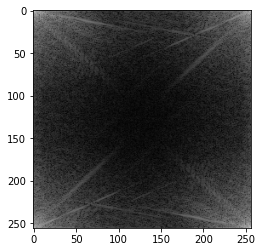

In [40]:
# 未shift前的幅度图，低频 -> 四周
y_mag = np.abs(img_y_freq)
y_mag_log = np.log(y_mag+1)
plt.imshow(y_mag_log, cmap='gray')
plt.show()

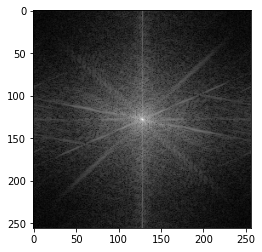

In [41]:
# shift后的幅度图，低频 -> 中心
y_freq_shift = np.fft.fftshift(img_y_freq)
plt.imshow(np.log(np.abs(y_freq_shift)+1), cmap='gray')
plt.show()

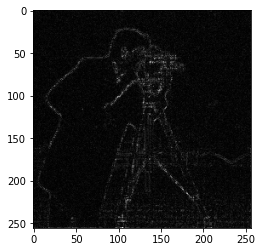

In [42]:
# 相位图 -> ifft2
y_Phase = np.fft.ifft2(np.exp(1j*np.angle(img_y_freq)))
plt.imshow(np.abs(y_Phase), cmap='gray')
plt.show()

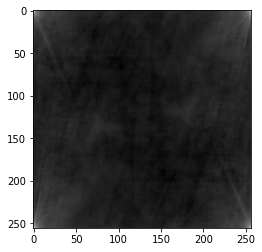

In [43]:
# 幅度图 -> ifft2
y_Mag = np.fft.ifft2(y_mag)
plt.imshow(np.log(np.abs(y_Mag)+1), cmap='gray')
plt.show()

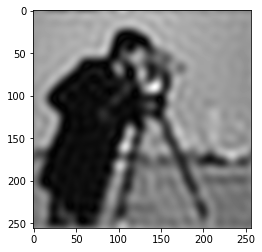

In [44]:
# 低通滤波
low_pass_y_freq = low_freq_mask * y_freq_shift
low_pass_y_freq = np.fft.ifftshift(low_pass_y_freq)
low_pass_y = np.fft.ifft2(low_pass_y_freq)
low_pass_y = np.abs(low_pass_y)
plt.imshow(low_pass_y, cmap='gray')
plt.show()

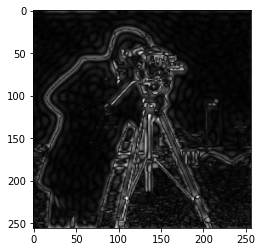

In [45]:
# 高通滤波
high_pass_y_freq = high_freq_mask * y_freq_shift
high_pass_y_freq = np.fft.ifftshift(high_pass_y_freq)
high_pass_y = np.fft.ifft2(high_pass_y_freq)
high_pass_y = np.abs(high_pass_y)
plt.imshow(high_pass_y, cmap='gray')
plt.show()